#where the data is elaborted on
https://www.bls.gov/help/hlpforma.htm

#This is where the data is from 
https://download.bls.gov/pub/time.series/jt/


In [1]:
import pandas as pd
import numpy as np
import datetime

import seaborn as sns

In [2]:
def year_per_datetime(jt_year, jt_period):
    
    if jt_period[1:] == 13:
        print(jt_period[1:])
        return 'bad'
    
    date_time_string = str(jt_year)+' '+ str(jt_period[1:])
    
    #print(date_time_string)
    
    dt_year_month = datetime.datetime.strptime(date_time_string, '%Y %m')
    
    #print(dt_year_month)
    
    return dt_year_month

In [3]:
#set some options for pandas viewing
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

In [4]:
#download all of the files from gov
df_job_openings = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.data.2.JobOpenings', delimiter = "\t")

df_hires = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.data.3.Hires', delimiter = "\t")

df_separations = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.data.4.TotalSeparations', delimiter ="\t")

df_layoffs = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.data.5.Quits', delimiter = "\t")

df_quits = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.data.6.LayoffsDischarges', delimiter = "\t")


#These are the tables to halp identify the codes. Yes, that was a typo
df_industry_codes = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.industry', delimiter = "\t")

df_state_codes = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.state', delimiter = "\t")

df_area_codes = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.area', delimiter = "\t")

df_size_class_codes = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.sizeclass', delimiter = "\t")

df_data_element_codes = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.dataelement', delimiter = "\t")

df_rate_level_codes = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.ratelevel', delimiter = "\t")

df_series_codes = pd.read_csv('https://download.bls.gov/pub/time.series/jt/jt.series', delimiter = "\t")



In [5]:
df_series_codes.head()

,series_id,seasonal,industry_code,state_code,area_code,sizeclass_code,dataelement_code,ratelevel_code,footnote_codes,begin_year,begin_period,end_year,end_period
0,JTS000000000000000HIL,S,0,00,0,0,HI,L,NaN,2000,M12,2021,M03
1,JTS000000000000000HIR,S,0,00,0,0,HI,R,NaN,2000,M12,2021,M03
2,JTS000000000000000JOL,S,0,00,0,0,JO,L,NaN,2000,M12,2021,M03
3,JTS000000000000000JOR,S,0,00,0,0,JO,R,NaN,2000,M12,2021,M03
4,JTS000000000000000LDL,S,0,00,0,0,LD,L,NaN,2000,M12,2021,M03


In [6]:
df_rate_level_codes.head()

,ratelevel_code,ratelevel_text,display_level,selectable,sort_sequence
0,L,Level - In Thousands,0,T,2
1,R,Rate,0,T,1


In [7]:
#merge all the dataframes to get a megadataframe with codes to text
#industry codes
df_series_ind = df_series_codes.merge(df_industry_codes, how='left', on='industry_code')

#state coes 
df_series_state = df_series_ind.merge(df_state_codes, how='left', on='state_code')

#area codes 
df_series_area = df_series_state.merge(df_area_codes, how='left', on='area_code')

#size class codes = 
df_series_class = df_series_area.merge(df_size_class_codes, how='left', on='sizeclass_code')

#data element codes 
df_series_elem = df_series_class.merge(df_data_element_codes, how='left', on='dataelement_code')

#rate level codes 
df_series_rate_level = df_series_elem.merge(df_rate_level_codes, how='left', on='ratelevel_code')

df_series_key = df_series_rate_level.copy()

In [8]:
df_series_key.head()

,series_id,seasonal,industry_code,state_code,area_code,sizeclass_code,dataelement_code,ratelevel_code,footnote_codes,begin_year,begin_period,end_year,end_period,industry_text,display_level_x,selectable_x,sort_sequence_x,state_text,display_level_y,selectable_y,sort_sequence_y,area_text,display_level_x,selectable_x,sort_sequence_x,sizeclass_text,display_level_y,selectable_y,sort_sequence_y,dataelement_text,display_level_x,selectable_x,sort_sequence_x,ratelevel_text,display_level_y,selectable_y,sort_sequence_y
0,JTS000000000000000HIL,S,0,00,0,0,HI,L,NaN,2000,M12,2021,M03,Total nonfarm,0,T,1,Total US,0,T,1,All areas,0,T,1,All size classes,0,T,1,Hires,0,T,2,Level - In Thousands,0,T,2
1,JTS000000000000000HIR,S,0,00,0,0,HI,R,NaN,2000,M12,2021,M03,Total nonfarm,0,T,1,Total US,0,T,1,All areas,0,T,1,All size classes,0,T,1,Hires,0,T,2,Rate,0,T,1
2,JTS000000000000000JOL,S,0,00,0,0,JO,L,NaN,2000,M12,2021,M03,Total nonfarm,0,T,1,Total US,0,T,1,All areas,0,T,1,All size classes,0,T,1,Job openings,0,T,1,Level - In Thousands,0,T,2
3,JTS000000000000000JOR,S,0,00,0,0,JO,R,NaN,2000,M12,2021,M03,Total nonfarm,0,T,1,Total US,0,T,1,All areas,0,T,1,All size classes,0,T,1,Job openings,0,T,1,Rate,0,T,1
4,JTS000000000000000LDL,S,0,00,0,0,LD,L,NaN,2000,M12,2021,M03,Total nonfarm,0,T,1,Total US,0,T,1,All areas,0,T,1,All size classes,0,T,1,Layoffs and discharges,1,T,5,Level - In Thousands,0,T,2


In [9]:
df_series_key['state_text'].value_counts()

Total US            817
Northeast region     24
Midwest region       24
South region         24
West region          24
Name: state_text, dtype: int64

In [10]:
#Job openings
df_job_openings_unalias = df_job_openings.merge(df_series_key, how='left', on='series_id                     ')

df_job_openings_west = df_job_openings_unalias[(df_job_openings_unalias['state_text']=='Total US') & (df_job_openings_unalias['ratelevel_code']=='L') & (df_job_openings_unalias['seasonal']=='S')].copy()

df_job_openings_west['dt_year_month'] = df_job_openings_west.apply(lambda x: year_per_datetime(x['year'], x['period']),axis =1)

df_job_openings_west.head()

,series_id,year,period,value,footnote_codes_x,seasonal,industry_code,state_code,area_code,sizeclass_code,dataelement_code,ratelevel_code,footnote_codes_y,begin_year,begin_period,end_year,end_period,industry_text,display_level_x,selectable_x,sort_sequence_x,state_text,display_level_y,selectable_y,sort_sequence_y,area_text,display_level_x,selectable_x,sort_sequence_x,sizeclass_text,display_level_y,selectable_y,sort_sequence_y,dataelement_text,display_level_x,selectable_x,sort_sequence_x,ratelevel_text,display_level_y,selectable_y,sort_sequence_y,dt_year_month
0,JTS000000000000000JOL,2000,M12,5088.0,NaN,S,0,00,0,0,JO,L,NaN,2000,M12,2021,M03,Total nonfarm,0,T,1,Total US,0,T,1,All areas,0,T,1,All size classes,0,T,1,Job openings,0,T,1,Level - In Thousands,0,T,2,2000-12-01
1,JTS000000000000000JOL,2001,M01,5234.0,NaN,S,0,00,0,0,JO,L,NaN,2000,M12,2021,M03,Total nonfarm,0,T,1,Total US,0,T,1,All areas,0,T,1,All size classes,0,T,1,Job openings,0,T,1,Level - In Thousands,0,T,2,2001-01-01
2,JTS000000000000000JOL,2001,M02,5097.0,NaN,S,0,00,0,0,JO,L,NaN,2000,M12,2021,M03,Total nonfarm,0,T,1,Total US,0,T,1,All areas,0,T,1,All size classes,0,T,1,Job openings,0,T,1,Level - In Thousands,0,T,2,2001-02-01
3,JTS000000000000000JOL,2001,M03,4762.0,NaN,S,0,00,0,0,JO,L,NaN,2000,M12,2021,M03,Total nonfarm,0,T,1,Total US,0,T,1,All areas,0,T,1,All size classes,0,T,1,Job openings,0,T,1,Level - In Thousands,0,T,2,2001-03-01
4,JTS000000000000000JOL,2001,M04,4615.0,NaN,S,0,00,0,0,JO,L,NaN,2000,M12,2021,M03,Total nonfarm,0,T,1,Total US,0,T,1,All areas,0,T,1,All size classes,0,T,1,Job openings,0,T,1,Level - In Thousands,0,T,2,2001-04-01


Text(0.5, 1.0, 'Job Openings Vs Time')

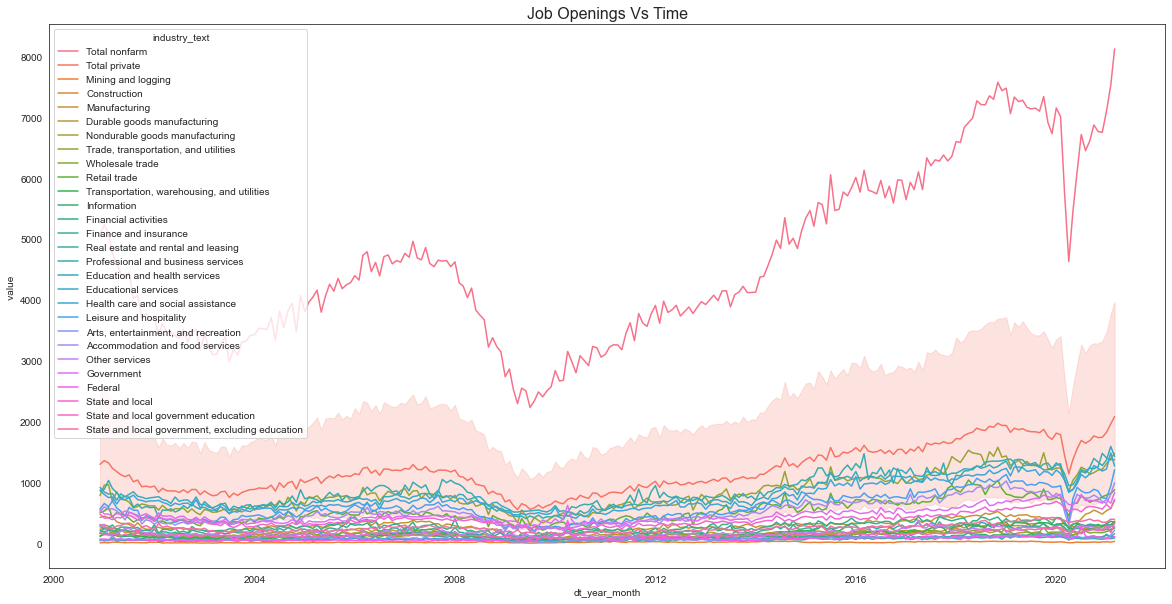

In [11]:
#job openings
sns.set_style("white")
sns.set_context({"figure.figsize": (20, 10)})

labor_openings = sns.lineplot(data=df_job_openings_west, x='dt_year_month', y='       value', hue="industry_text")

labor_openings.set_title('Job Openings vs Time'.title(),fontsize=16)


In [12]:
#Hires for the US
df_hires_unalias = df_hires.merge(df_series_key, how='left', on='series_id                     ')

df_hires_unalias_no13 = df_hires_unalias[df_hires_unalias['period']!='M13'].copy()

df_hires_unalias_no13['dt_year_month'] = df_hires_unalias_no13.apply(lambda x: year_per_datetime(x['year'], x['period']),axis =1)

df_hires_west = df_hires_unalias_no13[(df_hires_unalias_no13['state_text']=='Total US') & (df_hires_unalias_no13['ratelevel_code']=='L') & (df_hires_unalias_no13['seasonal']=='S')].copy()



Text(0.5, 1.0, 'Job Hires Vs Time')

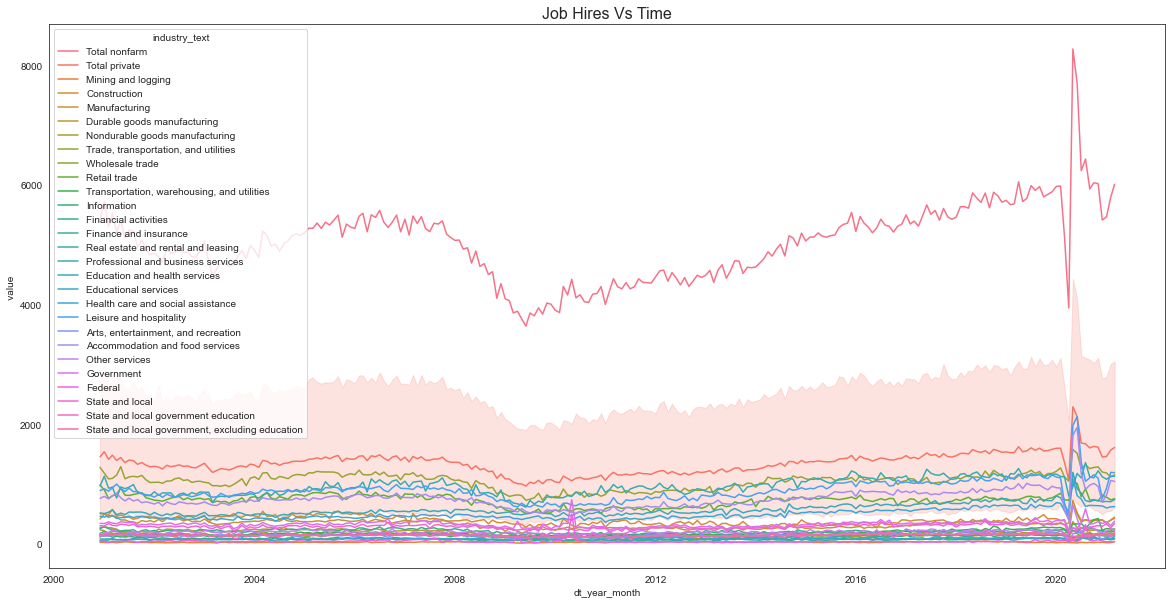

In [13]:
#job hires
sns.set_style("white")
sns.set_context({"figure.figsize": (20, 10)})

labor_openings = sns.lineplot(data=df_hires_west, x='dt_year_month', y='       value', hue="industry_text")

labor_openings.set_title('Job Hires vs Time'.title(),fontsize=16)


In [14]:
#Layoffs
df_layoffs_unalias = df_layoffs.merge(df_series_key, how='left', on='series_id                     ')

df_layoffs_unalias_no13 = df_layoffs_unalias[df_layoffs_unalias['period']!='M13'].copy()

df_layoffs_unalias_no13['dt_year_month'] = df_layoffs_unalias_no13.apply(lambda x: year_per_datetime(x['year'], x['period']),axis =1)

df_layoffs_west = df_layoffs_unalias_no13[(df_layoffs_unalias_no13['state_text']=='Total US') & (df_layoffs_unalias_no13['ratelevel_code']=='L') & (df_layoffs_unalias_no13['seasonal']=='S')].copy()


Text(0.5, 1.0, 'Job Layoffs Vs Time')

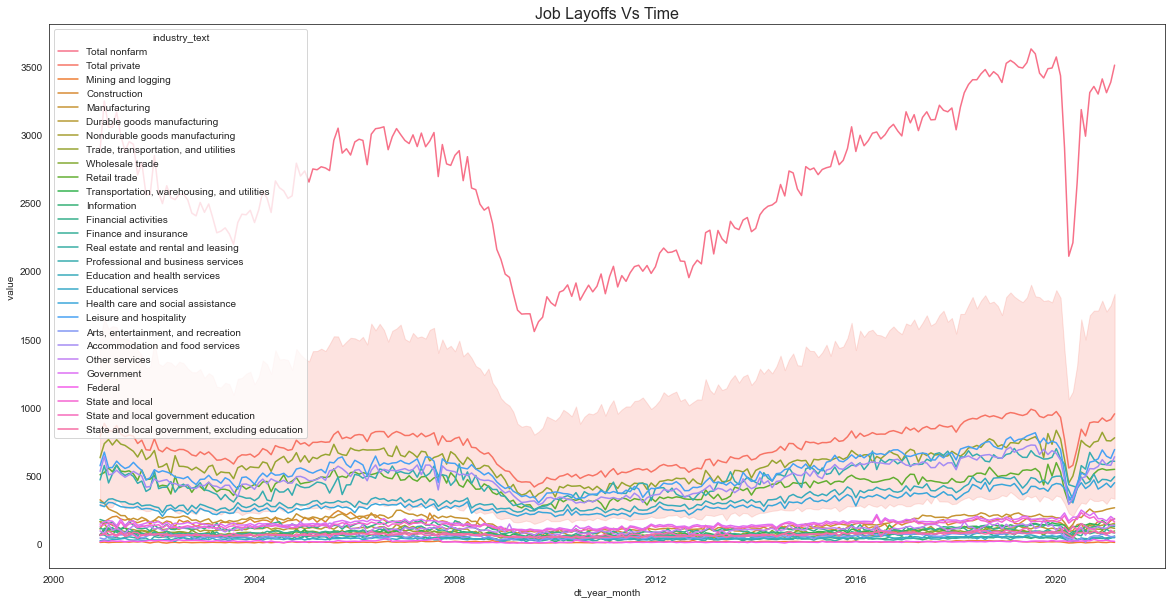

In [15]:
#job Layoffs
sns.set_style("white")
sns.set_context({"figure.figsize": (20, 10)})

labor_openings = sns.lineplot(data=df_layoffs_west, x='dt_year_month', y='       value', hue="industry_text")

labor_openings.set_title('Job Layoffs vs Time'.title(),fontsize=16)


In [16]:
#df_quits
#quits
df_quits_unalias = df_quits.merge(df_series_key, how='left', on='series_id                     ')

df_quits_unalias_no13 = df_quits_unalias[df_quits_unalias['period']!='M13'].copy()

df_quits_unalias_no13['dt_year_month'] = df_quits_unalias_no13.apply(lambda x: year_per_datetime(x['year'], x['period']),axis =1)

df_quits_west = df_quits_unalias_no13[(df_quits_unalias_no13['state_text']=='Total US') & (df_quits_unalias_no13['ratelevel_code']=='L') & (df_quits_unalias_no13['seasonal']=='S')].copy()


Text(0.5, 1.0, 'Job Quits Vs Time')

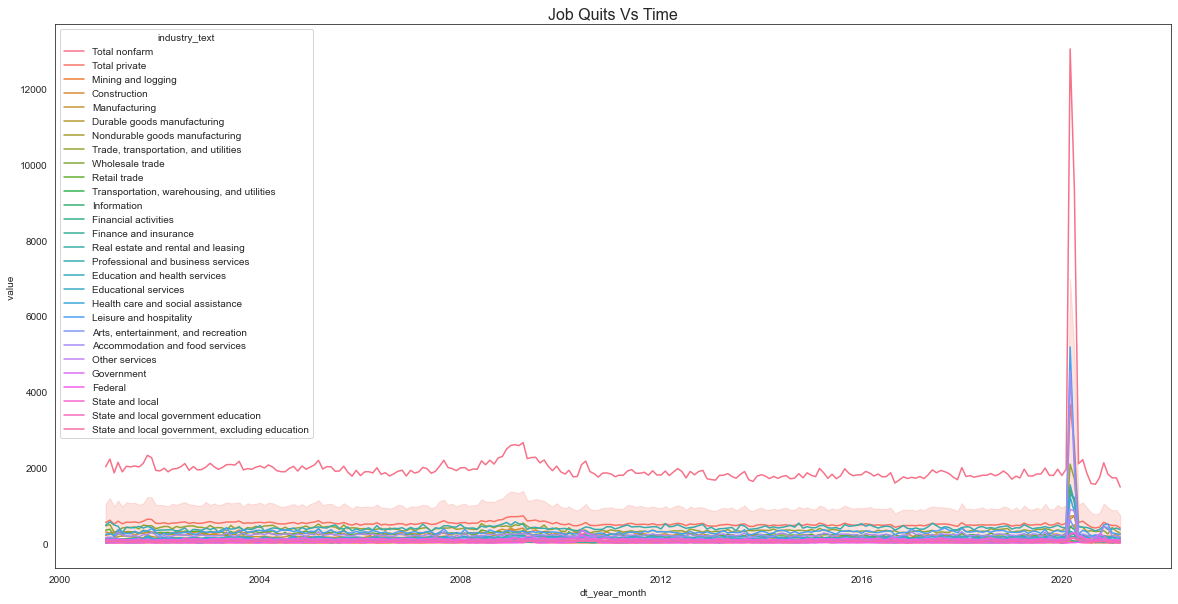

In [17]:
#job Layoffs
sns.set_style("white")
sns.set_context({"figure.figsize": (20, 10)})

labor_openings = sns.lineplot(data=df_quits_west, x='dt_year_month', y='       value', hue="industry_text")

labor_openings.set_title('Job Quits vs Time'.title(),fontsize=16)


In [18]:
#df_quits
#quits
df_separations_unalias = df_separations.merge(df_series_key, how='left', on='series_id                     ')

df_separations_unalias_no13 = df_separations_unalias[df_separations_unalias['period']!='M13'].copy()

df_separations_unalias_no13['dt_year_month'] = df_separations_unalias_no13.apply(lambda x: year_per_datetime(x['year'], x['period']),axis =1)

df_separations_west = df_separations_unalias_no13[(df_separations_unalias_no13['state_text']=='Total US') & (df_separations_unalias_no13['ratelevel_code']=='L') & (df_separations_unalias_no13['seasonal']=='S')].copy()


Text(0.5, 1.0, 'Job Separations Vs Time')

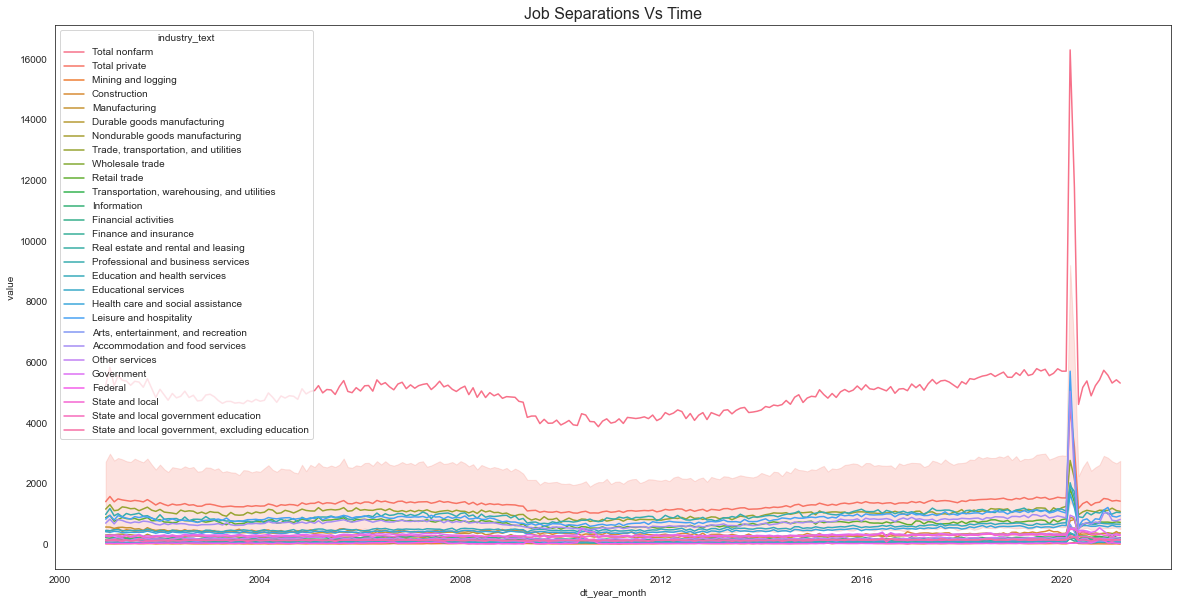

In [19]:
#job Layoffs
sns.set_style("white")
sns.set_context({"figure.figsize": (20, 10)})

labor_openings = sns.lineplot(data=df_separations_west, x='dt_year_month', y='       value', hue="industry_text")

labor_openings.set_title('Job Separations vs Time'.title(),fontsize=16)
